# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

/home/sharan/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [7]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.306990117 W= 0.5176525 b= -1.1269313
Epoch: 0100 cost= 0.280422747 W= 0.5017099 b= -1.0122397
Epoch: 0150 cost= 0.256923318 W= 0.48671532 b= -0.9043704
Epoch: 0200 cost= 0.236137033 W= 0.47261262 b= -0.8029161
Epoch: 0250 cost= 0.217751175 W= 0.45934862 b= -0.7074967
Epoch: 0300 cost= 0.201487988 W= 0.44687343 b= -0.6177505
Epoch: 0350 cost= 0.187103137 W= 0.43514034 b= -0.5333437
Epoch: 0400 cost= 0.174379289 W= 0.42410496 b= -0.4539559
Epoch: 0450 cost= 0.163124889 W= 0.4137259 b= -0.3792899
Epoch: 0500 cost= 0.153170258 W= 0.40396422 b= -0.30906463
Epoch: 0550 cost= 0.144365340 W= 0.3947831 b= -0.24301627
Epoch: 0600 cost= 0.136577368 W= 0.38614786 b= -0.18089579
Epoch: 0650 cost= 0.129688948 W= 0.3780264 b= -0.12247009
Epoch: 0700 cost= 0.123596206 W= 0.3703879 b= -0.06751916
Epoch: 0750 cost= 0.118207276 W= 0.36320367 b= -0.015836388
Epoch: 0800 cost= 0.113440886 W= 0.3564468 b= 0.032772534
Epoch: 0850 cost= 0.109225176 W= 0.35009167 b= 0.07849045
Epoch: 0900 c

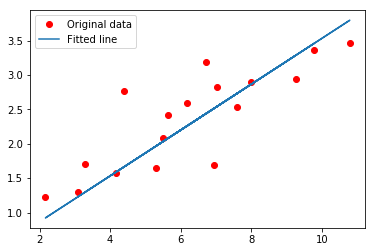

In [9]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [9]:
# Regression result